In [2]:
from pycalphad.tests.datasets import *
from pycalphad.core.solver import InteriorPointSolver
from pycalphad import equilibrium, Database, variables as v

ROSE_DBF = Database(ROSE_TDB)

class ProblemSaver(InteriorPointSolver):
    saved_problem = [None]
    def solve(self, prob):
        self.saved_problem[0] = prob
        self.verbose = True
        return super(ProblemSaver, self).solve(prob)

my_phases_rose = ['TEST']
comps = ['H', 'HE', 'LI', 'BE', 'B', 'C', 'N', 'O', 'F']
conds = dict({v.T: 1000, v.P: 101325})
for comp in comps[:-1]:
    conds[v.X(comp)] = 1.0/float(len(comps))
eqx = equilibrium(ROSE_DBF, comps, my_phases_rose, conds, verbose=False, solver=ProblemSaver())

Trying to improve poor solution
Chemical Potentials [-5888.80421816 -5888.88999055 -5888.86226516   922.04914093
 -5888.84858817   922.04914235   922.04914012   922.04914135
 -5780.80269595]
[5.00000000e-13 4.93461633e-18 5.00000000e-16 1.01572217e-12
 4.02593656e-10 1.01572216e-12 1.70412330e-10 4.02603357e-10
 1.70412330e-10 1.70412330e-10 1.70412330e-10 3.97234755e-10
 4.02588691e-10 1.01572217e-12 4.02575925e-10 1.70413568e-10
 1.01572218e-12 1.70413568e-10 1.70413568e-10 1.70413568e-10
 3.97237959e-10 3.95169500e-10 3.95180478e-10 3.95178123e-10
 2.01276775e-12 3.95174158e-10 2.01276775e-12 2.01276775e-12
 2.01276775e-12 3.89912783e-10 5.93726717e-11 5.93725966e-11
 5.93726165e-11 8.72995153e-12 5.93726233e-11 8.72995153e-12
 8.72995153e-12 8.72995154e-12 6.78225348e-13 2.25677632e-12
 2.25677600e-12 1.22658480e-12 3.35008067e-12]
[1.00000000e+00 1.01325000e+05 1.00000000e+03 4.92260594e-01
 1.24194703e-03 4.92260600e-01 2.93405999e-03 1.24191710e-03
 2.93405999e-03 2.93405999e-03

In [13]:
import numpy as np
soln = np.array(
    [1.00000000e+00, 1.01325000e+05, 1.00000000e+03, 4.95626896e-01,
 1.24946022e-03, 4.95626896e-01, 1.24945998e-03, 1.24946028e-03,
 1.24945576e-03, 1.24945992e-03, 1.24945599e-03, 1.24945550e-03,
 1.24945837e-03, 4.95626896e-01, 1.24945831e-03, 1.24945665e-03,
 4.95626896e-01, 1.24945929e-03, 1.24945659e-03, 1.24945951e-03,
 1.24945903e-03, 1.24945778e-03, 1.24945631e-03, 1.24945773e-03,
 4.95626896e-01, 1.24945636e-03, 1.24945987e-03, 4.95626896e-01,
 1.24946009e-03, 1.24945960e-03, 1.24945850e-03, 1.24945851e-03,
 1.24945855e-03, 1.24945846e-03, 1.24945845e-03, 1.24945797e-03,
 1.24945851e-03, 4.95628987e-01, 4.95624804e-01, 1.24945843e-03,
 1.24945844e-03, 1.24945848e-03, 1.24945838e-03, 1.24945838e-03,
 4.95627361e-01, 1.24945844e-03, 4.95626431e-01, 1.24945789e-03,
 1.24945860e-03, 1.24945861e-03, 1.24945866e-03, 1.24945856e-03,
 1.24945856e-03, 4.95626195e-01, 1.24945861e-03, 1.24945826e-03,
 4.95627595e-01, 2.22222222e-01, 2.22222222e-01, 2.22222222e-01,
 1.11111058e-01, 1.11110798e-01, 1.11111477e-01]
)

temps = np.arange(300,1000,1e-1)
obj = np.zeros_like(temps)
grad = np.zeros_like(temps)
error = np.zeros_like(temps)
for idx, temp in enumerate(temps):
    copy_of_soln = np.array(soln)
    copy_of_soln[2] = temp
    obj[idx] = ProblemSaver.saved_problem[0].objective(copy_of_soln)
    grad[idx] = ProblemSaver.saved_problem[0].gradient(copy_of_soln)[2]
error = np.abs(np.gradient(obj, 1e-1) - grad)

In [57]:
cons_idx = -4
selected_index = 6
step = 1e-5
inputs = np.arange(1e-12,1-1e-12,step)
obj = np.zeros_like(inputs)
grad = np.zeros_like(inputs)
error = np.zeros_like(inputs)
for idx, val in enumerate(inputs):
    copy_of_soln = np.array(soln)
    copy_of_soln[selected_index] = val
    obj[idx] = ProblemSaver.saved_problem[0].constraints(copy_of_soln)[cons_idx]
    grad[idx] = ProblemSaver.saved_problem[0].jacobian(copy_of_soln)[cons_idx,selected_index]
error = np.abs(np.gradient(obj, step) - grad)

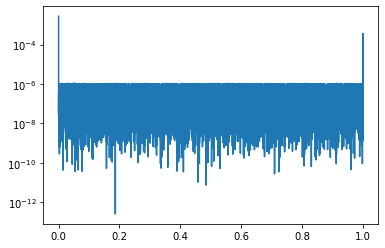

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.semilogy(inputs, error)
#plt.ylim((1e-13,1e-6))

In [59]:
error

array([2.78568275e-03, 9.06824198e-08, 2.67480118e-07, ...,
       2.36121409e-07, 8.52935287e-07, 3.48522489e-04])